In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler

In [159]:
# Loading the dataset
data = pd.read_excel(r"C:\Users\ANJITH SM\ICT Exit Exam\dataset1.xlsx")
data.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [210]:
df = data.copy()  # Copying the dataset to another value df
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


## 1. Finding the mean median and standard deviation

In [213]:
df['DepTime'].mean()  # Mean of the column 'DepTime'. It gives the average of the values.

1341.52388

In [215]:
df['DepTime'].median()  # Median of the column 'DepTime'. 

1330.0

In [217]:
df['DepTime'].std()  # Standard Deviation of the column 'DepTime'. It shows the spread of values in the column 'DepTime'. 

476.3784446151376

## 4. How many unique "Origin" and "Dest" airports are present in the dataset?

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         99995 non-null   object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      99996 non-null   object
 5   Origin             99996 non-null   object
 6   Dest               99999 non-null   object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [222]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [224]:
df["Origin"].nunique(dropna = True)

289

In [226]:
df["Dest"].nunique(dropna = True)

289

## 5. Is there any relationship between the "Distance" and whether a flight is delayed? Use correlation or scatter plots to support your analysis.

In [229]:
le = LabelEncoder()
df['dep_delayed_15min'] = le.fit_transform(df['dep_delayed_15min'])

In [231]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,0
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,0
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,0
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,0


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


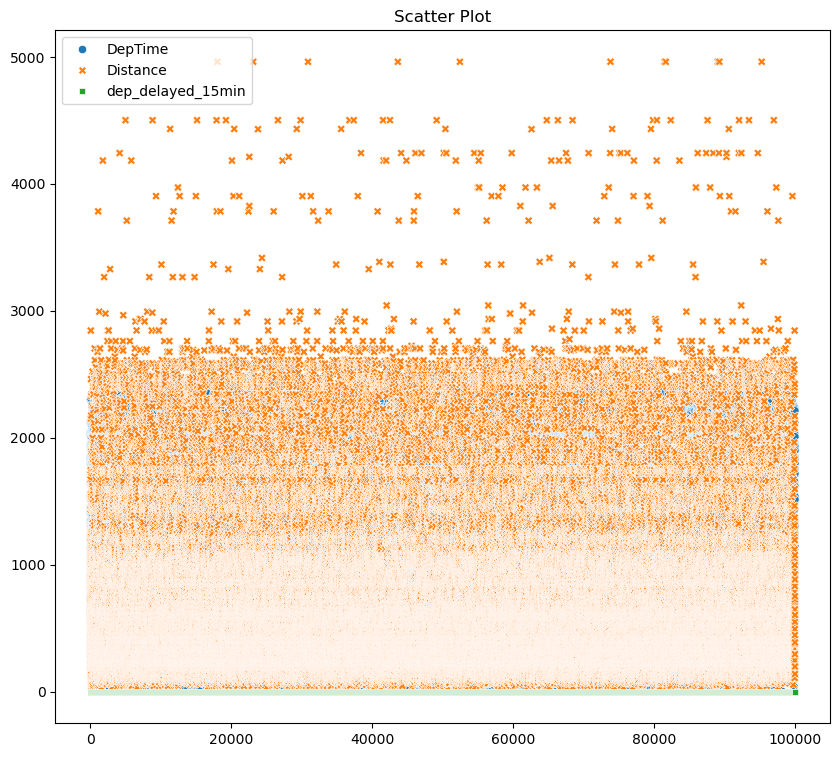

In [235]:
plt.figure(figsize = (10,9))
sns.scatterplot(data = df)
plt.title('Scatter Plot')
plt.show()

## 10.	Use a heatmap to show the relationship between "DayOfWeek" and "Month" with the number of delayed flights. What insights can you derive?

In [186]:
df["DayOfWeek"].nunique(dropna = True)

7

In [188]:
df["DayofMonth"].nunique(dropna = True)

31

In [249]:
df["dep_delayed_15min"].nunique(dropna = True)

2

In [251]:
df["DayOfWeek"] = le.fit_transform(df["DayOfWeek"])
df["DayofMonth"] = le.fit_transform(df["DayofMonth"])
df["dep_delayed_15min"] = le.fit_transform(df["dep_delayed_15min"])

In [253]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,13,6,1934,AA,ATL,DFW,732,0
1,c-4,12,2,1548,US,PIT,MCO,834,0
2,c-9,11,4,1422,XE,RDU,CLE,416,0
3,c-11,17,5,1015,OO,DEN,MEM,872,0
4,c-10,28,5,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,c-5,25,2,1618,OO,SFO,RDD,199,0
99996,c-1,9,2,804,CO,EWR,DAB,884,0
99997,c-1,16,1,1901,NW,DTW,IAH,1076,0
99998,c-4,19,3,1515,MQ,DFW,GGG,140,0


In [196]:
df.dtypes

Month                object
DayofMonth            int32
DayOfWeek             int32
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min     int32
dtype: object

In [281]:
corr_mat = ["DayOfWeek", "DayofMonth", "dep_delayed_15min"]
corr_mat

['DayOfWeek', 'DayofMonth', 'dep_delayed_15min']

In [283]:
correlation_matrix = df[corr_mat].corr()

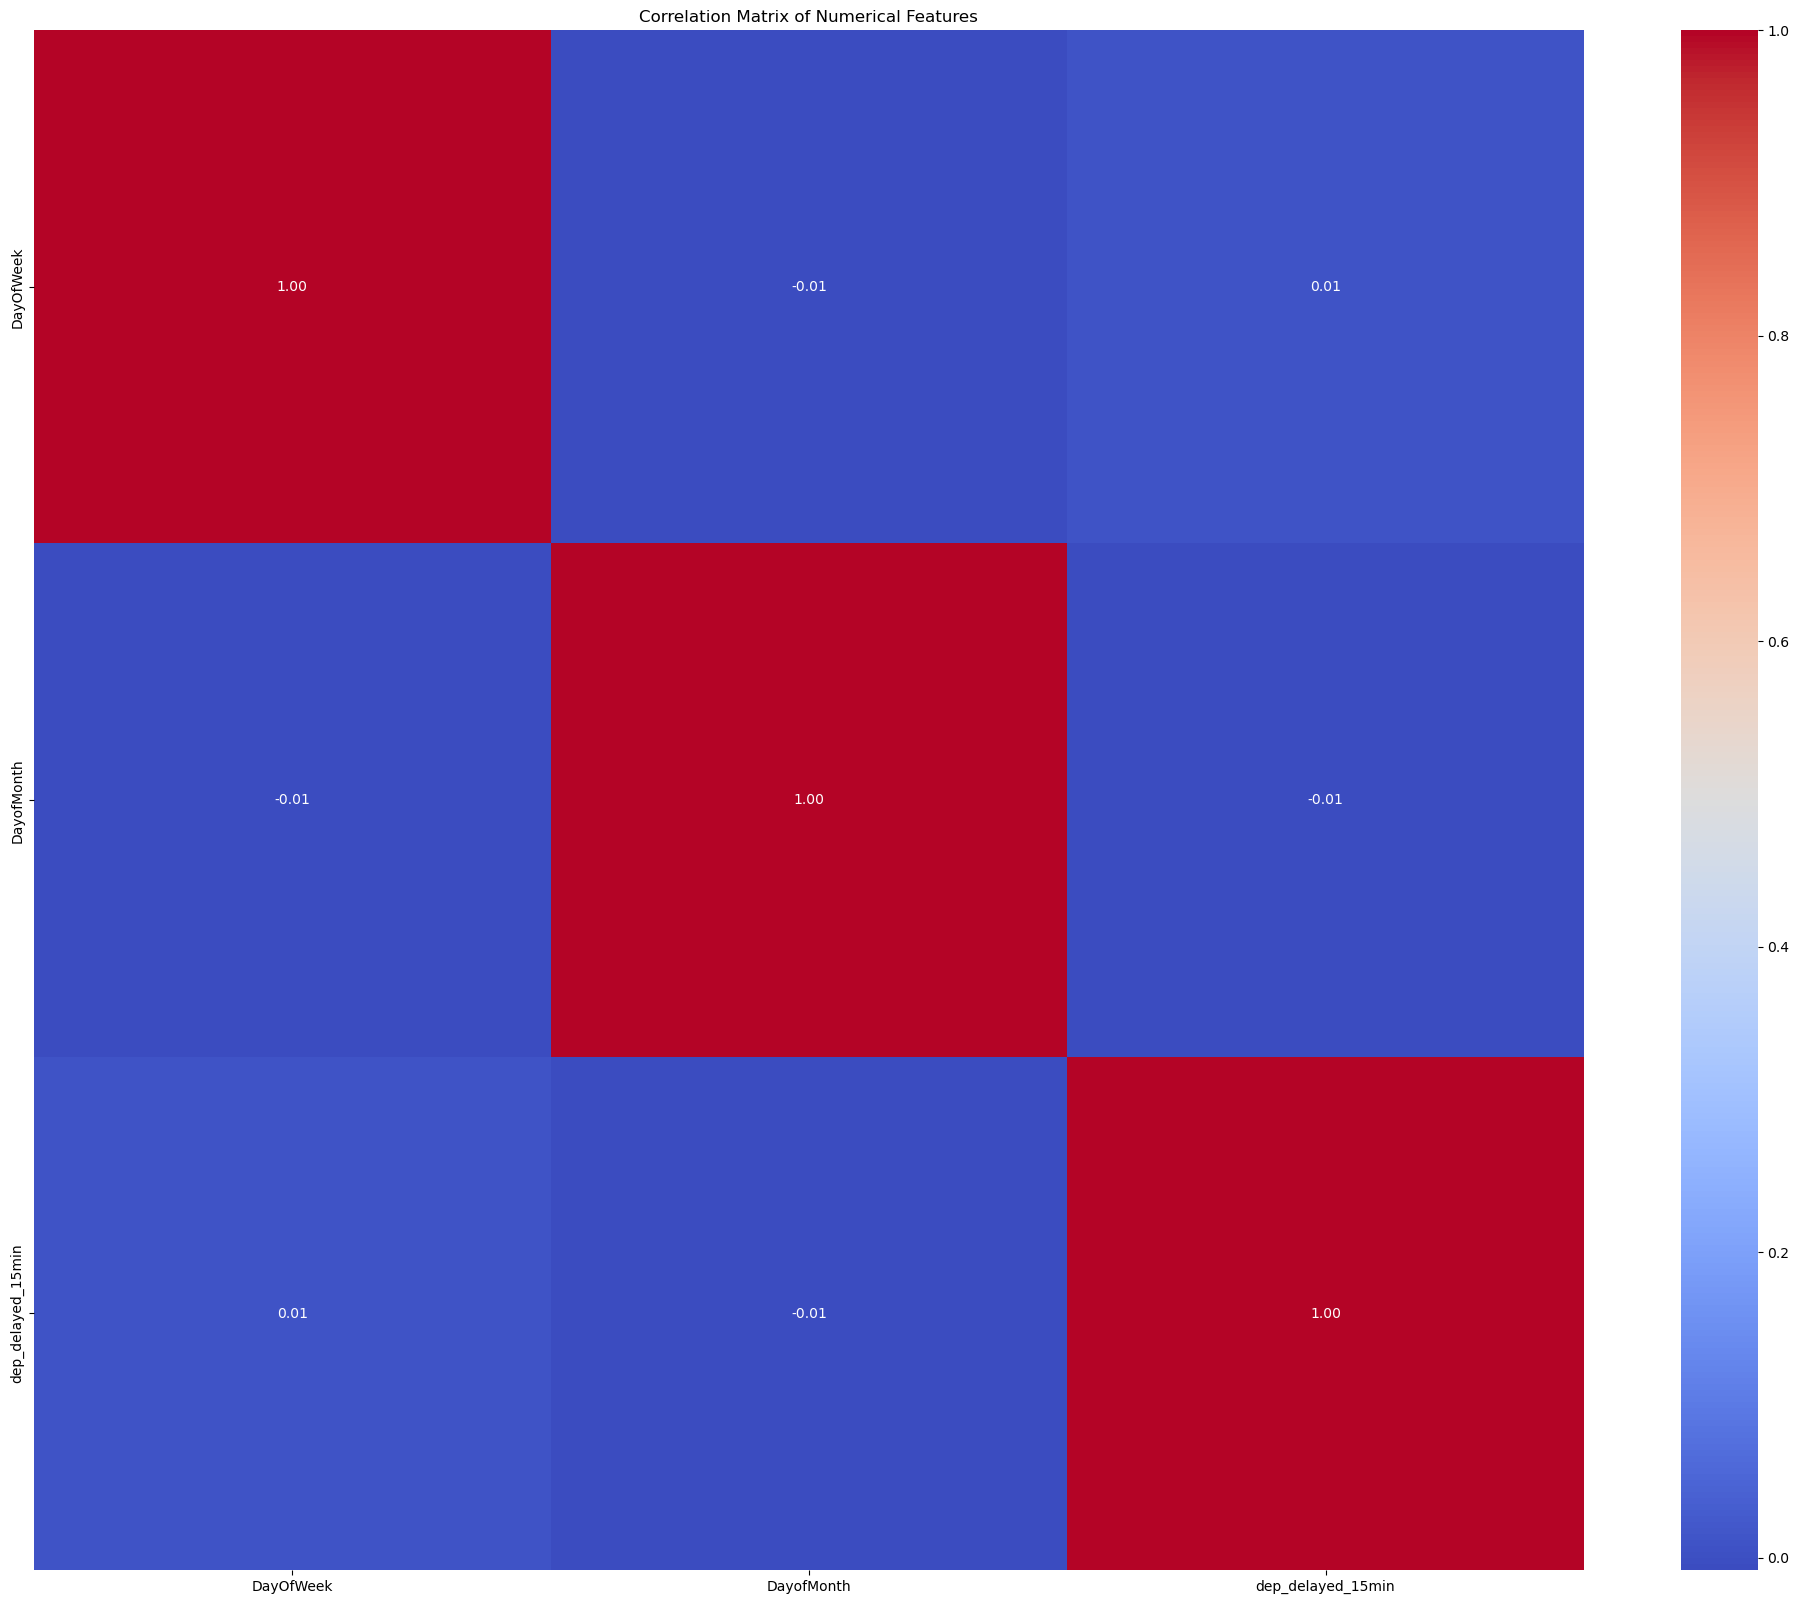

In [263]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of DayOfWeek" and "Month" with the number of delayed flights')
plt.show()